**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
print(vec)

 [1] "matrix.annotation.chipseq.tsv"                            
 [2] "matrix.annotation.subset.tsv"                             
 [3] "matrix.annotation.tss.chipseq_histone.chipseq_encode4.tsv"
 [4] "region.annotation.encode_chipseq_flagship.tsv"            
 [5] "region.annotation.encode_chipseq_histone.tsv"             
 [6] "region.annotation.encode_chipseq_subset.tsv"              
 [7] "region.annotation.encode_chromatin_states.tsv"            
 [8] "region.annotation.fcc_astarr_csaw.tsv"                    
 [9] "region.annotation.fcc_crispri_growth.tsv"                 
[10] "region.annotation.fcc_crispri_hcrff.tsv"                  
[11] "region.annotation.fcc_mpra_agarwal2023.tsv"               
[12] "region.annotation.fcc_starrmpra_junke.tsv"                
[13] "region.annotation.genome_tss.tsv"                         
[14] "region.annotation.hic_insitu_K562_ENCSR545YBD.tsv"        
[15] "region.annotation.hic_intact_K562_deep.tsv"               
[16] "region.annotation.h

## Import data

In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "region.summary.encode_chipseq_subset.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_chipseq_subset = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 428514     10


Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Annotation_A,Annotation_B,Group_B,Label_B,Region_B,Count_B
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,encode_chipseq_CTCF_ENCFF660GHM,ChIP-seq:Subset,CTCF,chr1:16127-16367,1
chr1,17288,17689,chr1:17288-17689,fcc_astarr_macs_input_overlap,encode_chipseq_POLR2A_ENCFF355MNE,ChIP-seq:Subset,POLR2A,chr1:17333-17518,1
chr1,115429,115969,chr1:115429-115969,fcc_astarr_macs_input_overlap,encode_chipseq_EP300_ENCFF702XPO,ChIP-seq:Subset,EP300,chr1:115579-115895,1


In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "region.summary.encode_chipseq_histone.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_chipseq_histone = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 511609     10


Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Annotation_A,Annotation_B,Group_B,Label_B,Region_B,Count_B
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,encode_chipseq_H3K36me3_ENCFF193ERO,ChIP-seq:Histone,H3K36me3,chr1:16092-16380,1
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,encode_chipseq_H3K36me3_ENCFF561OUZ,ChIP-seq:Histone,H3K36me3,chr1:16209-16339,1
chr1,137748,138049,chr1:137748-138049,fcc_astarr_macs_input_overlap,encode_chipseq_H3K27ac_ENCFF544LXB,ChIP-seq:Histone,H3K27ac,chr1:137650-138169,1


In [14]:
dat = dat_region_annot_chipseq_subset

###
dat = dat %>%
    dplyr::mutate(
        Chrom      = Chrom_A,
        ChromStart = ChromStart_A, 
        ChromEnd   = ChromEnd_A,
        Region     = Region_A,
        Group      = Group_B,
        Label      = Label_B
    ) %>%
    dplyr::select(Chrom, ChromStart, ChromEnd, Region, Group, Label)

dat_region_annot_final = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,Group,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,16025,16338,chr1:16025-16338,ChIP-seq:Subset,CTCF
chr1,17288,17689,chr1:17288-17689,ChIP-seq:Subset,POLR2A
chr1,115429,115969,chr1:115429-115969,ChIP-seq:Subset,EP300
chr1,115429,115969,chr1:115429-115969,ChIP-seq:Subset,NFE2
chr1,115429,115969,chr1:115429-115969,ChIP-seq:Subset,NRF1
chr1,115429,115969,chr1:115429-115969,ChIP-seq:Subset,POLR2A


In [15]:
theme_text = 
    theme(legend.position = "None") +
    theme(axis.text.x  = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    theme(axis.text.y  = element_blank()) +
    theme(axis.ticks.y = element_blank())

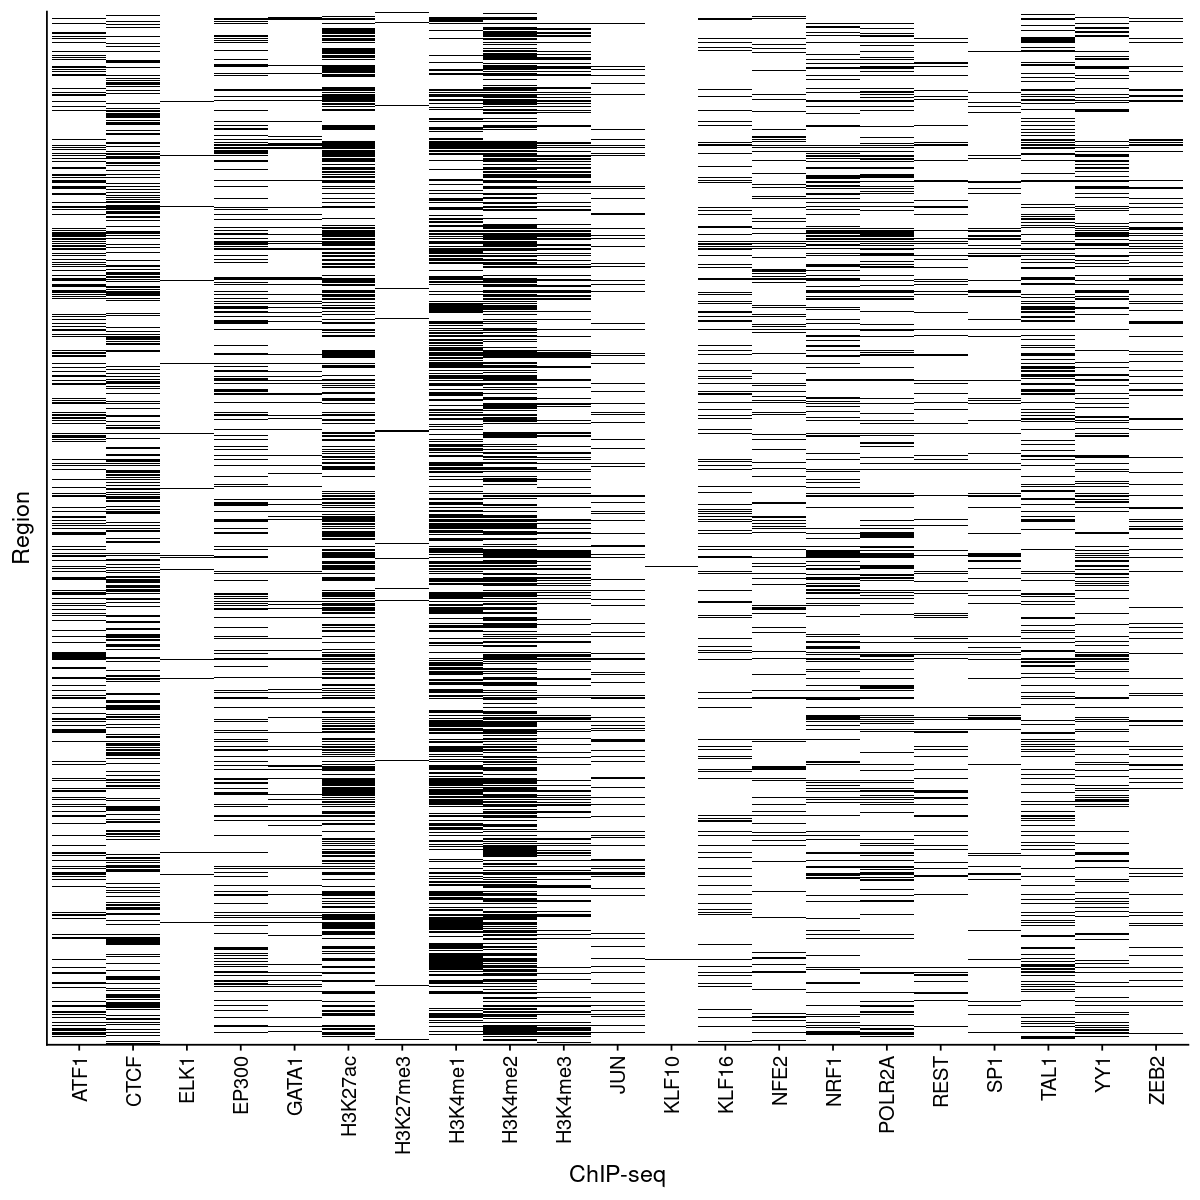

In [29]:
dat = dat_region_annot_final
dat = dat %>% dplyr::filter(Chrom == "chrX") 

gpt = ggplot(dat, aes(x=Label, y=Region)) +
    geom_tile(fill="black") + 
    labs(x="ChIP-seq", y="Region") +
    theme_cowplot() +
    theme_text
options(repr.plot.height = 10, repr.plot.width=10)
print(gpt)

In [17]:
dat = dat_region_annot_final
dat = dat %>% dplyr::filter(Chrom == "chrX")

dat = dat %>% 
    dplyr::mutate(Value  = 1) %>%    
    dplyr::select(Region, Label, Value) %>%
    tidyr::spread(Label, Value) %>%
    replace(is.na(.), 0) %>%
    column_to_rownames("Region")

mat_region_annot = dat
print(dim(dat))
head(dat)

[1] 2379   21


,ATF1,CTCF,ELK1,EP300,GATA1,H3K27ac,H3K27me3,H3K4me1,H3K4me2,H3K4me3,⋯,KLF10,KLF16,NFE2,NRF1,POLR2A,REST,SP1,TAL1,YY1,ZEB2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX:10014495-10015522,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,1,0,1,0
chrX:10047058-10047541,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,1,0,0
chrX:100671085-100671553,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chrX:100674856-100675178,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
chrX:100685783-100686138,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chrX:100731318-100732236,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0


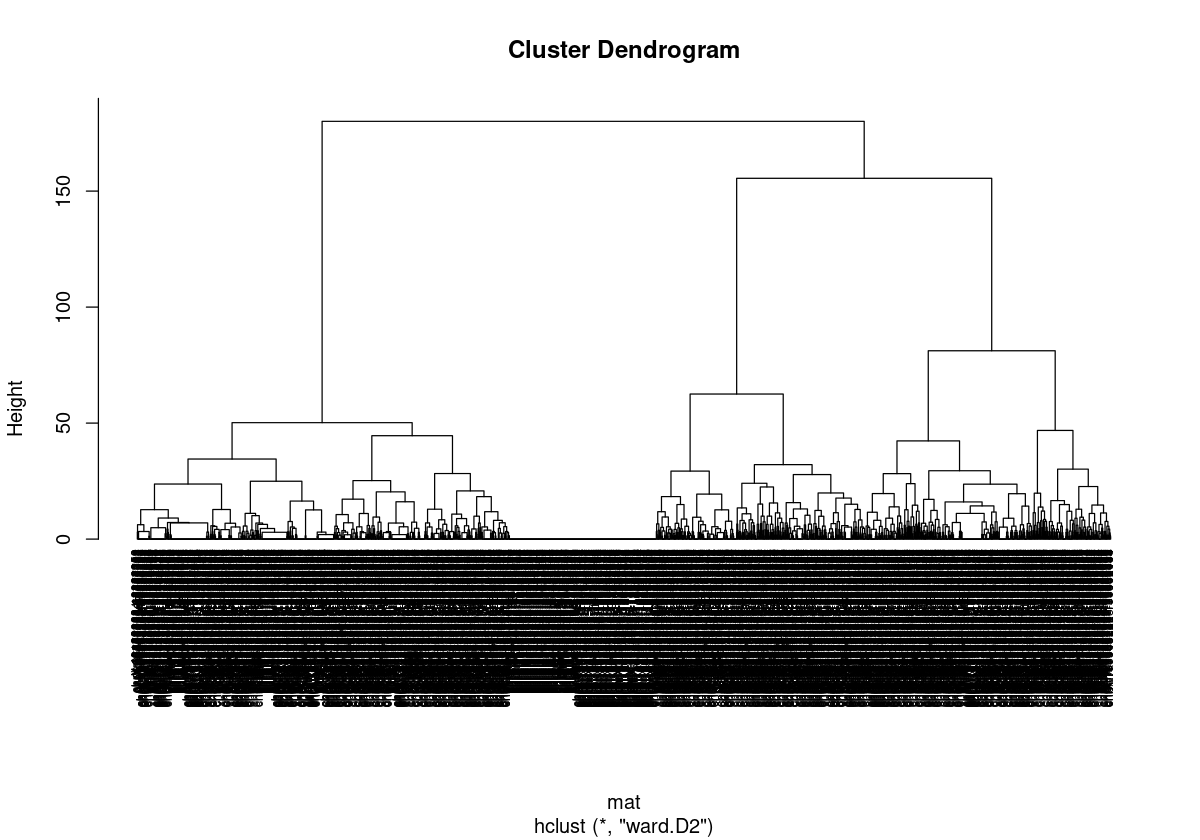

In [23]:
mat = mat_region_annot
mat = dist(mat,  method = "manhattan")
res = hclust(mat, method = "ward.D2")

res_hcl_row = res

options(repr.plot.height = 7, repr.plot.width=10)
plot(res, hang = -1, cex = 0.6)

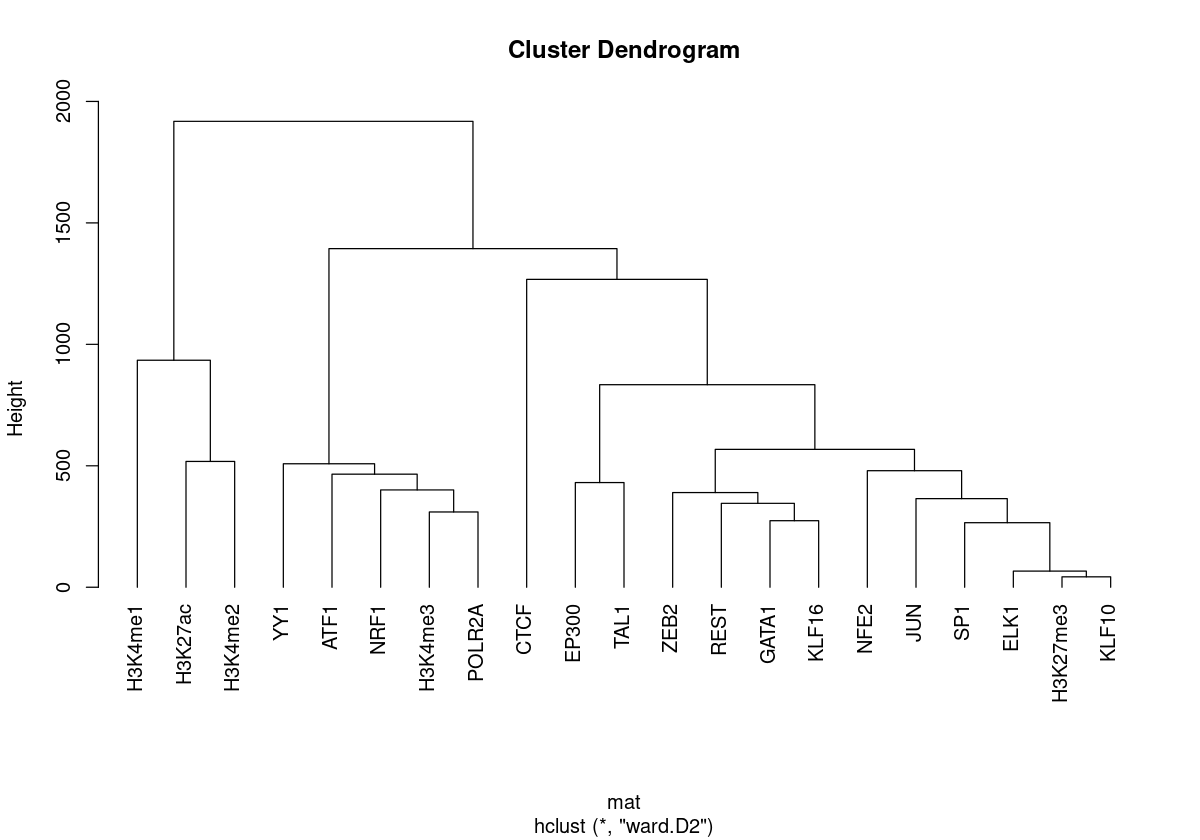

In [24]:
mat = t(mat_region_annot)
mat = dist(mat,  method = "manhattan")
res = hclust(mat, method = "ward.D2")

res_hcl_col = res

options(repr.plot.height = 7, repr.plot.width=10)
plot(res, hang = -1, cex = 1)

In [25]:
mat = mat_region_annot
res = res_hcl_row

vec = rownames(mat)
idx = res$order
vec = vec[idx]

vec_txt_region = vec
head(vec)

[1] "chrX:13103463-13103959" "chrX:1383384-1384089"   "chrX:68182501-68182792"
[4] "chrX:65576833-65577494" "chrX:47059386-47059742" "chrX:44705758-44706560"

In [26]:
mat = mat_region_annot
res = res_hcl_col

vec = colnames(mat)
idx = res$order
vec = vec[idx]

vec_txt_feature = vec
head(vec)

[1] "H3K4me1" "H3K27ac" "H3K4me2" "YY1"     "ATF1"    "NRF1"

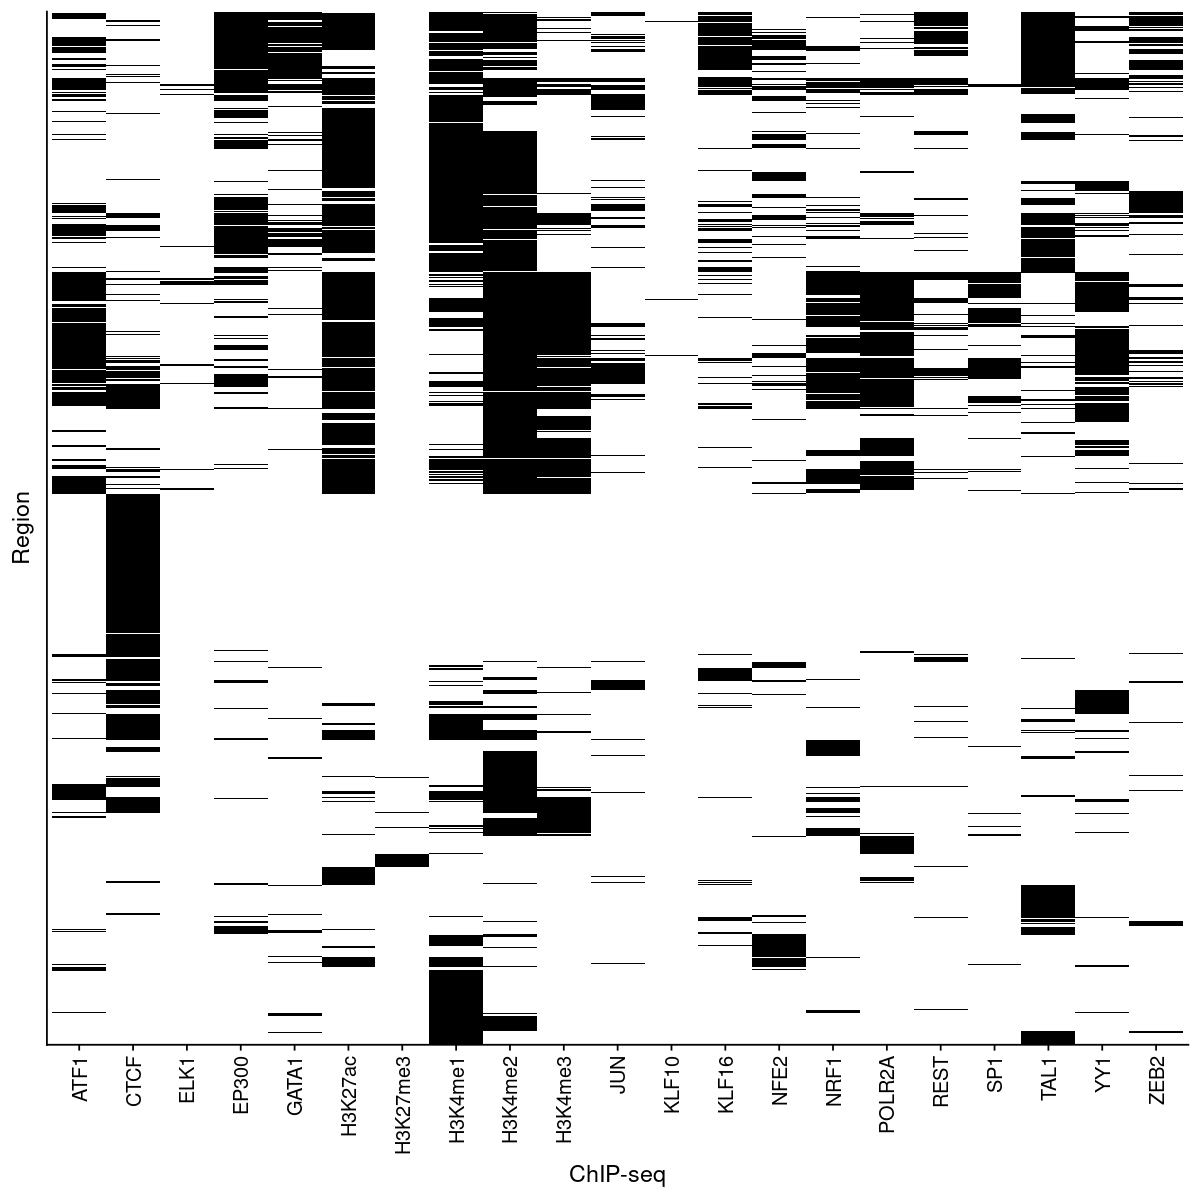

In [30]:
dat = dat_region_annot_final
dat = dat %>% 
    dplyr::filter(Chrom == "chrX") %>%
    dplyr::mutate(
        Group  = factor(Label,  levels = vec_txt_feature),
        Region = factor(Region, levels = vec_txt_region)
    )

gpt = ggplot(dat, aes(x=Label, y=Region)) +
    geom_tile(fill="black") + 
    labs(x="ChIP-seq", y="Region") +
    theme_cowplot() +
    theme_text

options(repr.plot.height = 10, repr.plot.width=10)
print(gpt)

In [32]:
library(pheatmap)

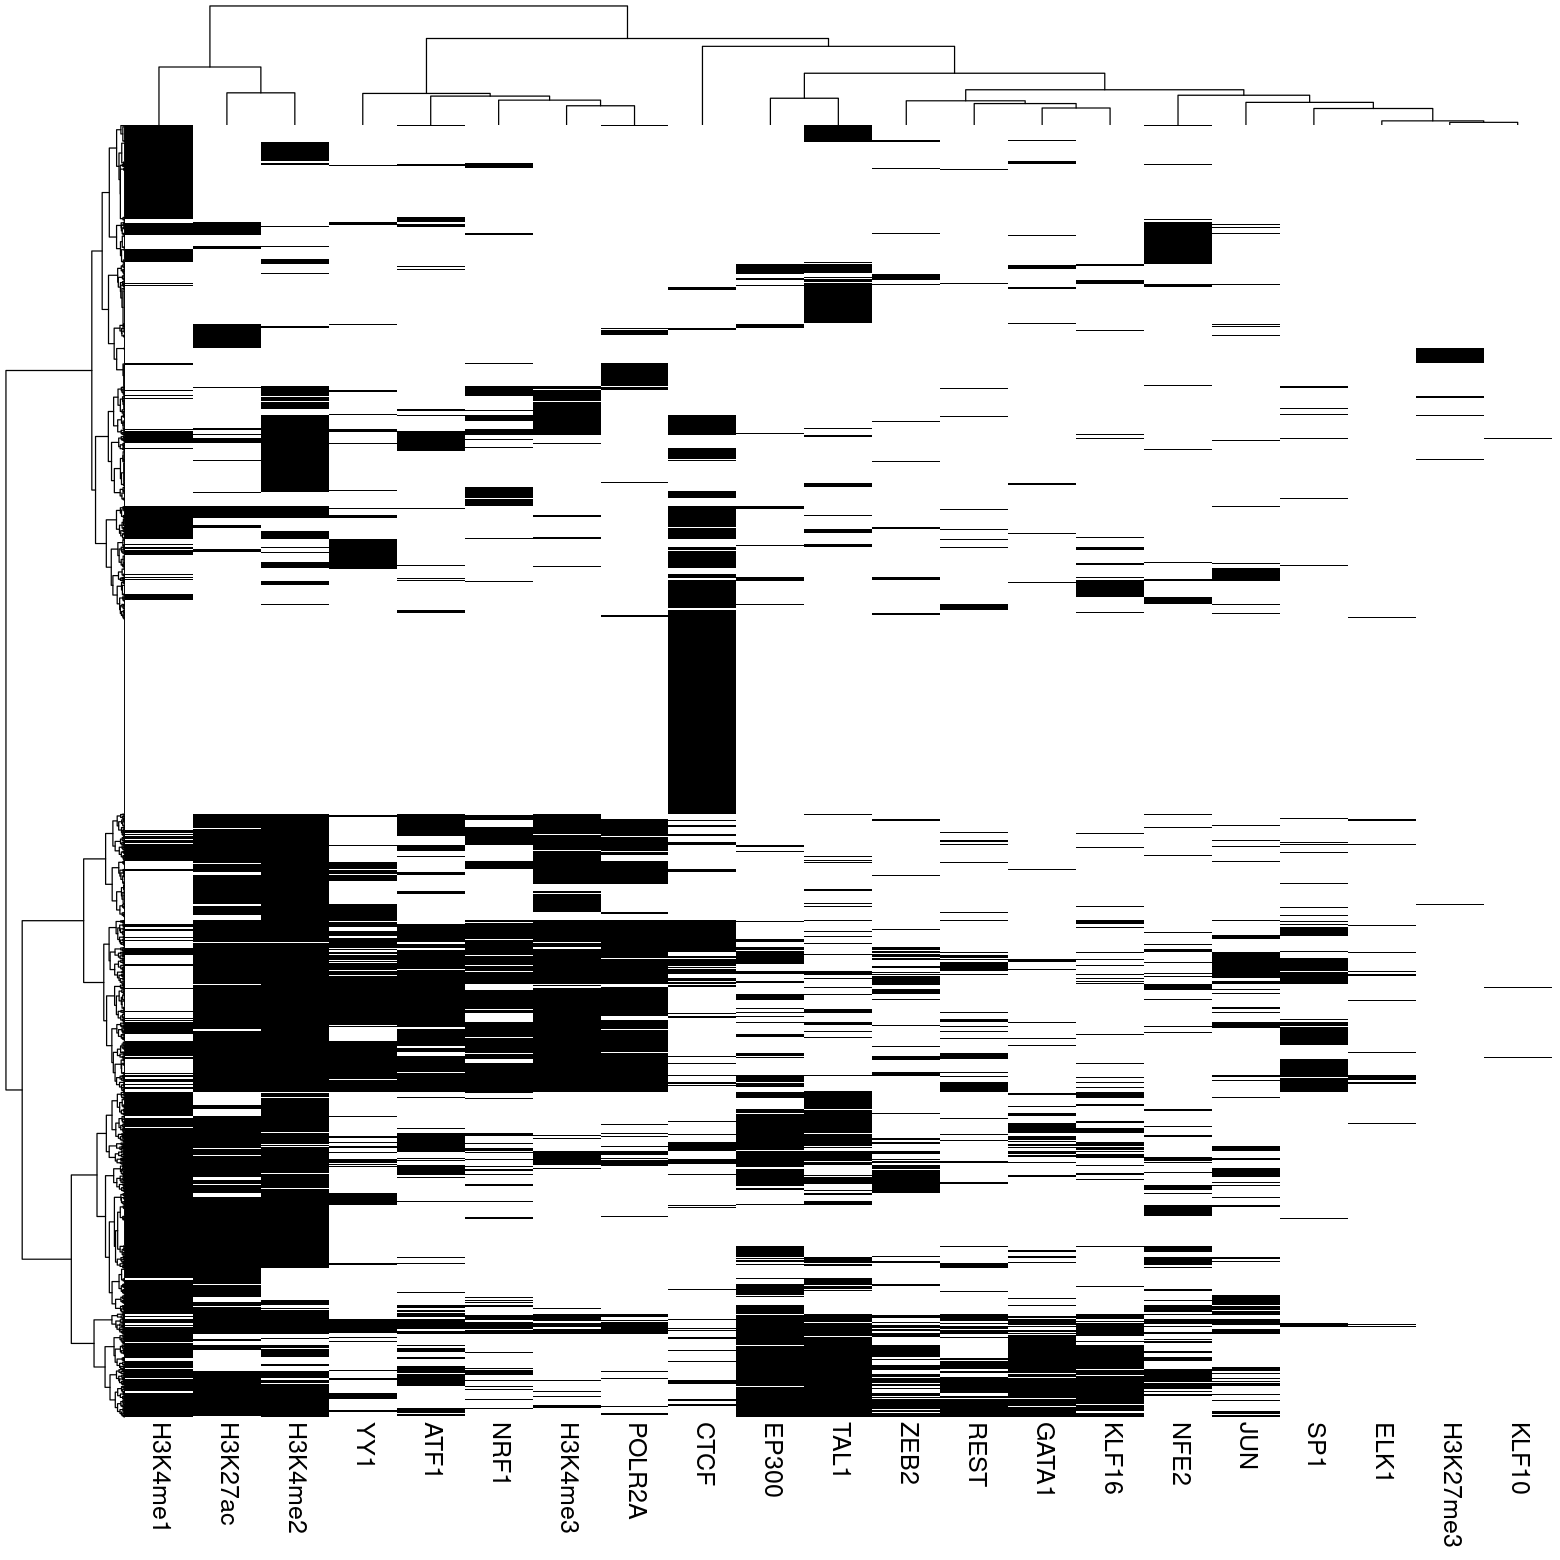

In [49]:
mat = mat_region_annot
options(repr.plot.height = 13, repr.plot.width=13)
pheatmap(
    mat,
    clustering_distance_rows = "manhattan",
    clustering_distance_cols = "manhattan",
    clustering_method        = "ward.D2",
    fontsize                 = 15,
    treeheight_row           = 70,
    treeheight_col           = 70,
    show_rownames            = FALSE,
    legend                   = FALSE,
    color = c("white", "black")
)

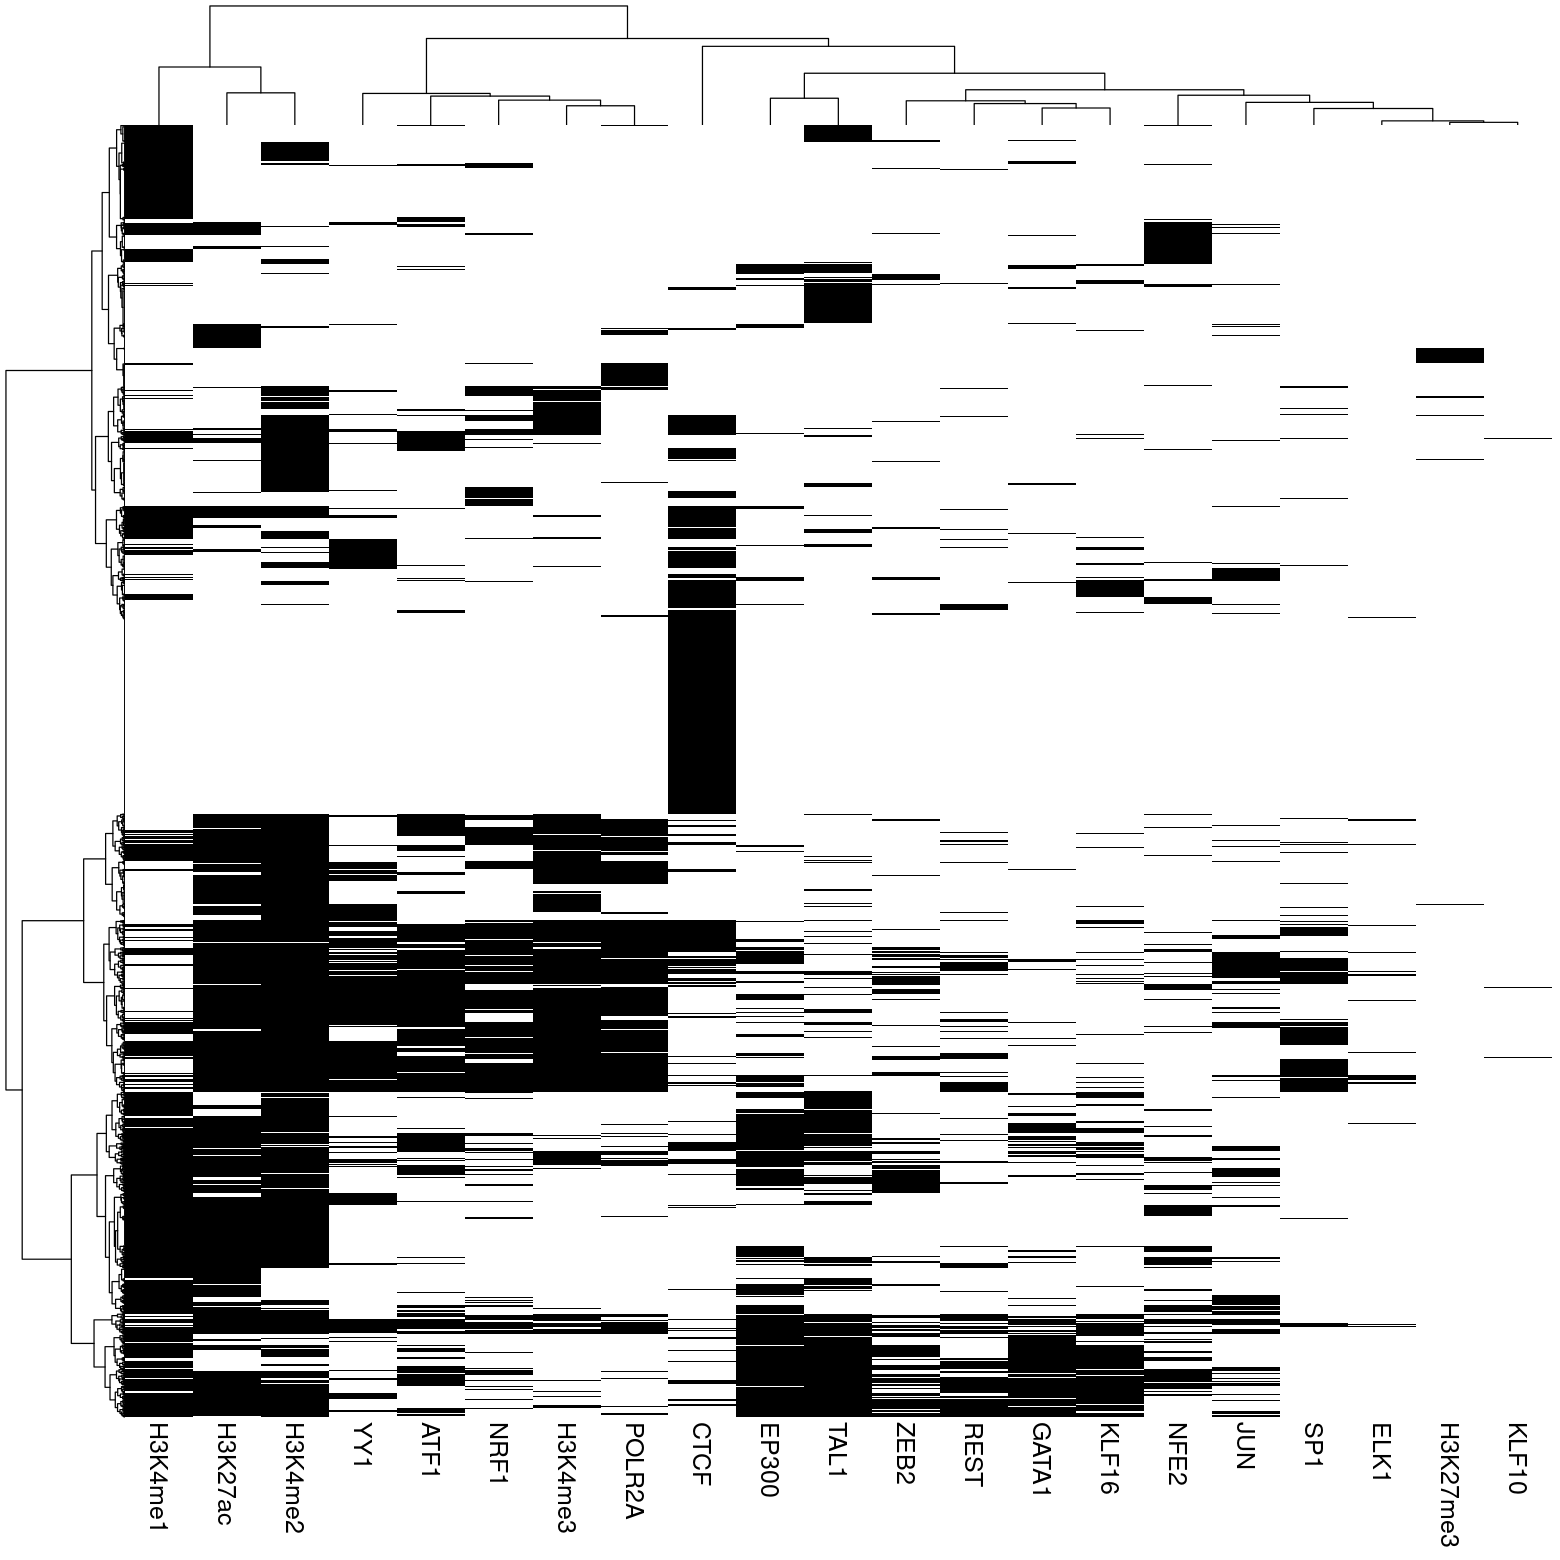

In [50]:
mat = mat_region_annot
options(repr.plot.height = 13, repr.plot.width=13)
pheatmap(
    mat,
    cluster_rows = res_hcl_row,
    cluster_cols = res_hcl_col,
    #clustering_distance_rows = "manhattan",
    #clustering_distance_cols = "manhattan",
    #clustering_method        = "ward.D2",
    fontsize                 = 15,
    treeheight_row           = 70,
    treeheight_col           = 70,
    show_rownames            = FALSE,
    legend                   = FALSE,
    color = c("white", "black")
)

In [ ]:
###
lst = list(
    dat_region_annot_chipseq_subset,
    dat_region_annot_chipseq_histone
)

###
lst = lapply(lst, function(dat){
    ###
    dat = dat %>%
        dplyr::mutate(
            Chrom      = Chrom_A,
            ChromStart = ChromStart_A, 
            ChromEnd   = ChromEnd_A,
            Region     = Region_A,
            Group      = Group_B,
            Label      = Label_B
        ) %>%
        dplyr::select(Chrom, ChromStart, ChromEnd, Region, Group, Label)
    return(dat)
})

###
dat = bind_rows(lst)
dat = dat %>% 
    dplyr::filter(Label %in% vec_txt_label_fcc) %>% 
    dplyr::distinct()
dat1 = dat

###
dat = dat %>%
    dplyr::group_by(Chrom, ChromStart, ChromEnd, Region, Group) %>%
    dplyr::summarize(
        Label = paste(sort(unique(Label)), collapse = ","),
        .groups = "drop"
    )
dat2 = dat

### assign and show
dat_region_annot_full    = dat1
dat_region_annot_summary = dat2